# This notebook will include slight data cleaning, data analysis and modelling using regression and KNN

## Importing packages and cleaning data

In [1]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import sklearn as sk
import geopandas as gpd

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 



import matplotlib.pyplot as plt
import seaborn as sns

import random
random.seed(123)

In [2]:
#read in the data
london_df=pd.read_csv("data//london_detailed.csv")
london_df

C:\Python36\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,neighbourhood,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,beds,price,weekly_price,monthly_price,minimum_nights,maximum_nights,availability_365,number_of_reviews,reviews_per_month,host_is_superhost
0,0,11551,Brixton,London,51.46225,-0.11732,Apartment,Entire home/apt,4,1.0,...,1.0,$88.00,$645.00,"$2,350.00",3,180,336,185,1.58,t
1,1,38151,LB of Croydon,Upper Norwood,51.41940,-0.08722,Apartment,Private room,2,NaN,...,NaN,$65.00,NaN,NaN,1,730,365,0,NaN,f
2,2,13913,LB of Islington,Islington,51.56802,-0.11121,Apartment,Private room,2,1.0,...,0.0,$65.00,$333.00,"$1,176.00",1,29,365,19,0.17,f
3,3,38407,LB of Tower Hamlets,London,51.49995,-0.02624,Apartment,Entire home/apt,2,1.0,...,1.0,$79.00,$530.00,"$2,100.00",2,365,5,137,1.23,f
4,4,90700,Notting Hill,Kensington,51.51074,-0.19853,House,Entire home/apt,2,1.0,...,1.0,$105.00,NaN,NaN,2,1125,268,339,3.33,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85063,85063,39868875,LB of Waltham Forest,Greater London,51.58208,-0.00915,Apartment,Entire home/apt,2,1.0,...,1.0,$70.00,NaN,NaN,3,30,88,0,NaN,f
85064,85064,39869123,LB of Merton,Greater London,51.40628,-0.23244,House,Private room,2,1.0,...,2.0,$69.00,NaN,NaN,2,1125,113,0,NaN,f
85065,85065,39869214,LB of Hammersmith & Fulham,London,51.50244,-0.21547,Apartment,Entire home/apt,4,1.0,...,2.0,$90.00,NaN,NaN,3,1125,63,0,NaN,f
85066,85066,39869249,LB of Bromley,Greater London,51.35742,0.10764,Apartment,Private room,1,1.5,...,1.0,$30.00,NaN,NaN,2,1125,1,0,NaN,f


In [3]:
london_df.corr()

,Unnamed: 0,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,reviews_per_month
Unnamed: 0,1.000000,0.993765,0.000913,-0.011153,0.086053,0.038663,0.009086,0.043517,-0.032364,-0.005436,0.085380,-0.322682,0.268849
id,0.993765,1.000000,-0.001624,-0.011389,0.084818,0.038740,0.009125,0.043869,-0.032881,-0.005926,0.070800,-0.331091,0.256950
latitude,0.000913,-0.001624,1.000000,0.109929,-0.009998,-0.012303,-0.033038,-0.013670,0.005808,0.002914,-0.004299,-0.000583,0.004880
longitude,-0.011153,-0.011389,0.109929,1.000000,-0.044636,-0.051179,-0.046547,-0.045909,-0.005597,-0.002340,-0.034430,-0.022370,-0.027361
accommodates,0.086053,0.084818,-0.009998,-0.044636,1.000000,0.501779,0.769024,0.819426,-0.002297,-0.000599,0.073298,-0.051348,-0.034218
bathrooms,0.038663,0.038740,-0.012303,-0.051179,0.501779,1.000000,0.574870,0.501480,0.009357,-0.001884,0.038917,-0.046264,-0.042114
bedrooms,0.009086,0.009125,-0.033038,-0.046547,0.769024,0.574870,1.000000,0.735267,0.014313,-0.001727,-0.015965,-0.082671,-0.103228
beds,0.043517,0.043869,-0.013670,-0.045909,0.819426,0.501480,0.735267,1.000000,0.002129,-0.002248,0.052885,-0.049875,-0.039565
minimum_nights,-0.032364,-0.032881,0.005808,-0.005597,-0.002297,0.009357,0.014313,0.002129,1.000000,-0.000461,0.036571,-0.030509,-0.061042
maximum_nights,-0.005436,-0.005926,0.002914,-0.002340,-0.000599,-0.001884,-0.001727,-0.002248,-0.000461,1.000000,-0.002484,0.000010,-0.002505


In [4]:
#let's drop the columns we won't be using
london_df=london_df.drop(columns=['Unnamed: 0', 'id','weekly_price', 'monthly_price','availability_365',
                                 'reviews_per_month', 'city','maximum_nights','minimum_nights','number_of_reviews','property_type', 'beds'])

In [5]:
#our price column has a $ before the number, lets get rid of that
london_df['price'] = london_df.price.str.replace("\$|,",'').astype(float)


In [6]:
london_df.isna().sum()

neighbourhood          1
latitude               0
longitude              0
room_type              0
accommodates           0
bathrooms            121
bedrooms              89
price                  0
host_is_superhost     12
dtype: int64

In [7]:
#we have enough data to drop NANS
london_cleaned=london_df.dropna()

In [8]:
#We should see we have no NAs and also still retain most of the data
print("NAs:", london_cleaned.isna().sum())
print("Shape:", london_cleaned.shape)

NAs: neighbourhood        0
latitude             0
longitude            0
room_type            0
accommodates         0
bathrooms            0
bedrooms             0
price                0
host_is_superhost    0
dtype: int64
Shape: (84848, 9)


In [9]:
london_cleaned

,neighbourhood,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,price,host_is_superhost
0,Brixton,51.46225,-0.11732,Entire home/apt,4,1.0,1.0,88.0,t
2,LB of Islington,51.56802,-0.11121,Private room,2,1.0,1.0,65.0,f
3,LB of Tower Hamlets,51.49995,-0.02624,Entire home/apt,2,1.0,1.0,79.0,f
4,Notting Hill,51.51074,-0.19853,Entire home/apt,2,1.0,1.0,105.0,f
5,Chelsea,51.48796,-0.16898,Entire home/apt,2,1.0,1.0,100.0,f
...,...,...,...,...,...,...,...,...,...
85063,LB of Waltham Forest,51.58208,-0.00915,Entire home/apt,2,1.0,1.0,70.0,f
85064,LB of Merton,51.40628,-0.23244,Private room,2,1.0,1.0,69.0,f
85065,LB of Hammersmith & Fulham,51.50244,-0.21547,Entire home/apt,4,1.0,1.0,90.0,f
85066,LB of Bromley,51.35742,0.10764,Private room,1,1.5,1.0,30.0,f


As we can see our property_type might be valuable for estimating price. However it is currently a string. This will be one hot encoded, luckily pandas get dummies does the same thing



In [10]:
london_cleaned=pd.get_dummies(london_cleaned, columns=['room_type'])
london_cleaned=london_cleaned.replace({'t':1, 'f': 0})

## Regressions and PCA to predict price

In [11]:
#Lets select our features for the regression
features= london_cleaned.drop(columns=['neighbourhood', 'latitude', 'longitude','price'])

In [12]:
#simple regression model
X=features
y=london_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lm =LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print ("Score:", model.score(X_test, y_test))


Score: 0.11762151376706986


Accuracy of only 17%, how can we make this more accurate? let's start with scaling

In [13]:
standard_scaler=StandardScaler()

X_features=features

X_features_scaled=standard_scaler.fit_transform(X=X_features)

X_imputed_df = pd.DataFrame(X_features_scaled, columns = X_features.columns)


In [14]:
X=X_imputed_df
y=london_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lm =LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print ("Score:", model.score(X_test, y_test))


Score: 0.14143789127795536


Scaling didnt really help. Next will try PCA

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

lm =LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)



print ("Score:", model.score(X_test, y_test))

Score: 0.17192008479802312


In [16]:
# find optimal params
X=X_imputed_df
y=london_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

model =LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None, param_grid=param_grid)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
#print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid.best_params_)

r2 / variance :  0.13531663520521112
Best Params:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}


Still getting similar scores. Going to try ridge regression next

In [17]:
from sklearn.model_selection import cross_val_score


def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [18]:
X=X_imputed_df
y=london_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ridge = Ridge(alpha=1).fit(X_train, y_train)

predictions = ridge.predict(X_test)

get_cv_scores(ridge)


CV Mean:  0.13673674799787353
STD:  0.022798747924484906




In [19]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.13674034081235764


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.4s finished


Lasso Regression:

In [20]:
#Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(lasso)

CV Mean:  0.13665357324053223
STD:  0.022745872822475116




In [21]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    7.8s remaining:    5.9s


Best Score:  0.1367367987547248
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    8.5s finished


Takeaway: Regressions were not that great, lets move on to KNN. I will be using this guide: https://www.dataquest.io/blog/machine-learning-tutorial/

# KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsRegressor(algorithm='brute', weights='uniform',n_neighbors=14)    #default 5 neighbours

In [23]:
standard_scaler=StandardScaler()

features_scaled=standard_scaler.fit_transform(X=features)   #scale the features


In [24]:
X=features_scaled
y=london_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
knn=knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [26]:
mse= mean_squared_error(y_test, y_pred)
rmse=mse**(1/2)
rmse

196.48591124230097

https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

https://medium.com/datadriveninvestor/increase-10-accuracy-with-re-scaling-features-in-k-nearest-neighbors-python-code-677d28032a45

In [27]:
# grid_params= {
#     'n_neighbors' :[1,3,5,7,9,12,14],
#     'weights':['distance','uniform'],
# }

# grid = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, verbose=1, n_jobs=-1)
# grid_result = grid.fit(X_train, y_train)
# print('Best Score: ', grid_result.best_score_)
# print('Best estimator: ', grid_result.best_estimator_)
# print('Best Params: ', grid_result.best_params_)

# Creating new feature-Distance

I assume the distance to central london plays a large part in the price of airbnb, therefore, using the co ord of charing cross station for central london, I will use this value of wokring out distance between the station and airbnbs in london to create a anew feature called distance

In [28]:
london_gpd= gpd.GeoDataFrame(london_cleaned, geometry=gpd.points_from_xy(london_cleaned.longitude, london_cleaned.latitude),
                            crs="EPSG:4326")  #convert to geopandas dataframe

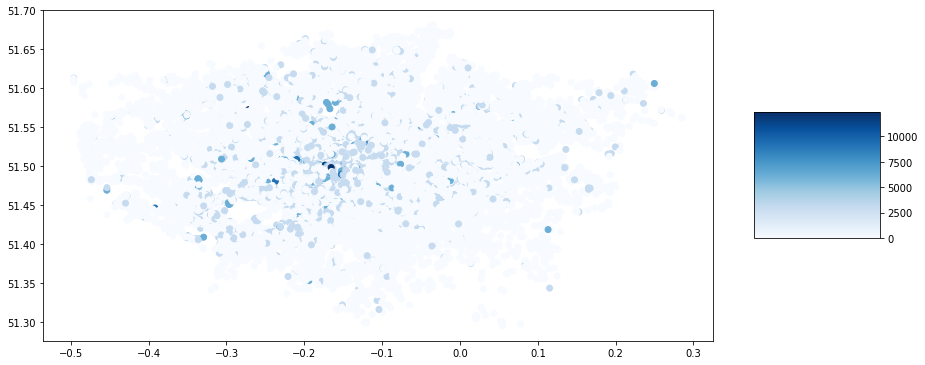

In [29]:
fig, ax = plt.subplots(figsize=(15,15))  #lets check where prices are highest

london_gpd.plot(column='price', cmap='Blues', scheme='FisherJenks',ax=ax, aspect=1)
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=london_gpd['price'].min(), vmax=london_gpd['price'].max()))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, aspect=1)

plt.show()

Darker the blue the higher the price. Price seems to be higher in central London, so lets create a new feature called distance to central london and see how that affect our regressions

In [30]:
london_gpd=london_gpd.to_crs(27700)  #convert to crs which uses metres

In [31]:
df_cc = pd.DataFrame(
    {'Loc': 'charingcross' ,
     'Longitude': [530241.18],
     'Latitude': [180458.01]})

In [32]:
gdf_cc = gpd.GeoDataFrame(
    df_cc, geometry=gpd.points_from_xy(df_cc.Longitude, df_cc.Latitude),  crs={'init':'epsg:27700'})  #gdf for charing cross

C:\Python36\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [33]:
gdf_cc=pd.concat([gdf_cc]*84860) #repeat it so the length matches the london one

In [34]:
gdf_cc.reset_index(inplace=True)

In [35]:
london_gpd.reset_index(inplace=True)

In [36]:
london_gpd['cc']=gdf_cc['geometry']   #overwrite the geometry column

In [37]:
london_gpd['distance']=london_gpd['geometry'].distance(london_gpd['cc'])   #distance

In [38]:
london_gpd   #now use the distance in the features

,index,neighbourhood,latitude,longitude,accommodates,bathrooms,bedrooms,price,host_is_superhost,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,geometry,cc,distance
0,0,Brixton,51.46225,-0.11732,4,1.0,1.0,88.0,1,1,0,0,0,POINT (530885.122 175377.940),POINT (530241.180 180458.010),5120.720136
1,2,LB of Islington,51.56802,-0.11121,2,1.0,1.0,65.0,0,0,0,1,0,POINT (531005.968 187150.843),POINT (530241.180 180458.010),6736.387224
2,3,LB of Tower Hamlets,51.49995,-0.02624,2,1.0,1.0,79.0,0,1,0,0,0,POINT (537098.821 179736.819),POINT (530241.180 180458.010),6895.459125
3,4,Notting Hill,51.51074,-0.19853,2,1.0,1.0,105.0,0,1,0,0,0,POINT (525111.259 180628.333),POINT (530241.180 180458.010),5132.748120
4,5,Chelsea,51.48796,-0.16898,2,1.0,1.0,100.0,0,1,0,0,0,POINT (527225.119 178145.995),POINT (530241.180 180458.010),3800.267760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84843,85063,LB of Waltham Forest,51.58208,-0.00915,2,1.0,1.0,70.0,0,1,0,0,0,POINT (538036.398 188901.984),POINT (530241.180 180458.010),11492.002589
84844,85064,LB of Merton,51.40628,-0.23244,2,1.0,1.0,69.0,0,0,0,1,0,POINT (523038.553 168954.587),POINT (530241.180 180458.010),13572.271923
84845,85065,LB of Hammersmith & Fulham,51.50244,-0.21547,4,1.0,1.0,90.0,0,1,0,0,0,POINT (523958.282 179676.537),POINT (530241.180 180458.010),6331.311839
84846,85066,LB of Bromley,51.35742,0.10764,1,1.5,1.0,30.0,0,0,0,1,0,POINT (546846.725 164146.768),POINT (530241.180 180458.010),23276.613495


## Let's create a model using our new variable, and also alter our features(removing outliers), and re run our regressions

In [39]:
london_distance= london_gpd.drop(columns=['neighbourhood', 'latitude', 'longitude','geometry', 'cc','index'])

In [43]:
london_distance.describe()

,accommodates,bathrooms,bedrooms,price,host_is_superhost,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance
count,79200.000000,79200.000000,79200.000000,79200.000000,79200.000000,79200.000000,79200.000000,79200.000000,79200.000000,79200.000000
mean,3.018283,1.245884,1.324457,91.251439,0.152879,0.533144,0.011692,0.447437,0.007727,7189.148010
std,1.813330,0.518045,0.798879,57.459794,0.359873,0.498903,0.107496,0.497233,0.087565,4371.264431
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.923536
25%,2.000000,1.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4176.092526
50%,2.000000,1.000000,1.000000,79.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6083.714279
75%,4.000000,1.500000,2.000000,120.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9262.314935
max,40.000000,10.500000,10.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29090.020611


In [77]:
london_distance=london_distance[(london_distance['price']<500) & (london_distance['price']>15)]  #drop outliers (1.5*IQR +Q3=280)

In [78]:
london_distance

,accommodates,bathrooms,bedrooms,price,host_is_superhost,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance
0,4,1.0,1.0,88.0,1,1,0,0,0,5120.720136
1,2,1.0,1.0,65.0,0,0,0,1,0,6736.387224
2,2,1.0,1.0,79.0,0,1,0,0,0,6895.459125
3,2,1.0,1.0,105.0,0,1,0,0,0,5132.748120
4,2,1.0,1.0,100.0,0,1,0,0,0,3800.267760
...,...,...,...,...,...,...,...,...,...,...
84843,2,1.0,1.0,70.0,0,1,0,0,0,11492.002589
84844,2,1.0,1.0,69.0,0,0,0,1,0,13572.271923
84845,4,1.0,1.0,90.0,0,1,0,0,0,6331.311839
84846,1,1.5,1.0,30.0,0,0,0,1,0,23276.613495


In [80]:
london_distance.describe()

,accommodates,bathrooms,bedrooms,price,host_is_superhost,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance
count,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000
mean,3.018295,1.243645,1.325270,91.580427,0.153183,0.534594,0.011715,0.446959,0.006732,7180.023171
std,1.801701,0.504020,0.799573,57.350153,0.360166,0.498805,0.107601,0.497182,0.081775,4365.808350
min,1.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.923536
25%,2.000000,1.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4174.367757
50%,2.000000,1.000000,1.000000,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6077.557332
75%,4.000000,1.500000,2.000000,120.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9244.931618
max,40.000000,10.500000,10.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29090.020611


In [81]:
scaler=StandardScaler()
london_distance_features=london_distance.drop(columns=['price'])
#london_distance_features=london_distance[['distance','accomodates','bedrooms','bathrooms']]
london_distance_features_scaled=scaler.fit_transform(X=london_distance_features)

london_distance_target=london_distance['price']

In [82]:
X=london_distance_features_scaled
y=london_distance_target

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
#linear regression
grid_params= {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}

grid = GridSearchCV(LinearRegression(), param_grid=grid_params, cv=None)
grid_result = grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)




r2 / variance :  0.5693662059381304
Best Score:  0.5693662059381304
Best estimator:  LinearRegression(copy_X='True', fit_intercept='True', normalize='True')
Best Params:  {'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}


In [98]:
#ridge regression
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)



Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished


Best Score:  0.5693456479233422


In [99]:
#lasso regression
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    7.1s remaining:    5.3s


Best Score:  0.5693454394391949
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    7.4s finished


In [87]:
#knn regressor
grid_params= {
    'n_neighbors' :[1,3,5,7,9,12,14,20,40,60,80,100],
    'weights':['distance','uniform'],
    'metric': ['minkowski', 'euclidean','manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best estimator: ', grid_result.best_estimator_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 11.3min finished


Best Score:  0.6199751996814596
Best estimator:  KNeighborsRegressor(metric='manhattan', n_neighbors=80)
Best Params:  {'metric': 'manhattan', 'n_neighbors': 80, 'weights': 'uniform'}


In [88]:
#knn is our most accurate model, lets see the root mean squared error
knn=KNeighborsRegressor(metric='manhattan', n_neighbors=80, weights='uniform')

knn=knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
rmse=mse**(1/2)
rmse   

35.52470938629875

Around ~60% accuracy now the outliers were removed. Without the new distance features, accuracy was lower by 8%, so good thing that was added in. 

In [89]:
#lets compare RMSE to mean and variance of df
london_distance.describe()


,accommodates,bathrooms,bedrooms,price,host_is_superhost,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance
count,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000,78873.000000
mean,3.018295,1.243645,1.325270,91.580427,0.153183,0.534594,0.011715,0.446959,0.006732,7180.023171
std,1.801701,0.504020,0.799573,57.350153,0.360166,0.498805,0.107601,0.497182,0.081775,4365.808350
min,1.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.923536
25%,2.000000,1.000000,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4174.367757
50%,2.000000,1.000000,1.000000,80.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6077.557332
75%,4.000000,1.500000,2.000000,120.000000,0.000000,1.000000,0.000000,1.000000,0.000000,9244.931618
max,40.000000,10.500000,10.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29090.020611


RMS:~35, mean of 91 and variance of 3249(std:57). Coeffecient of variation=0.629654425

# Attempt to plot 

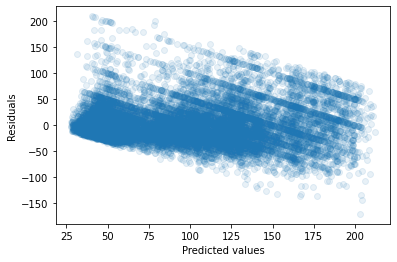

In [90]:
residuals = y_test-y_pred
plt.scatter(y_pred,residuals, alpha=0.1)
plt.ylabel("Residuals")
plt.xlabel("Predicted values")


plt.show()

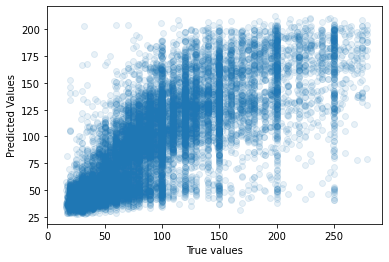

In [91]:
plt.scatter(y_test,y_pred,alpha=0.1)
plt.ylabel("Predicted Values")
plt.xlabel("True values")
plt.xlim(xmin=0)
plt.show()


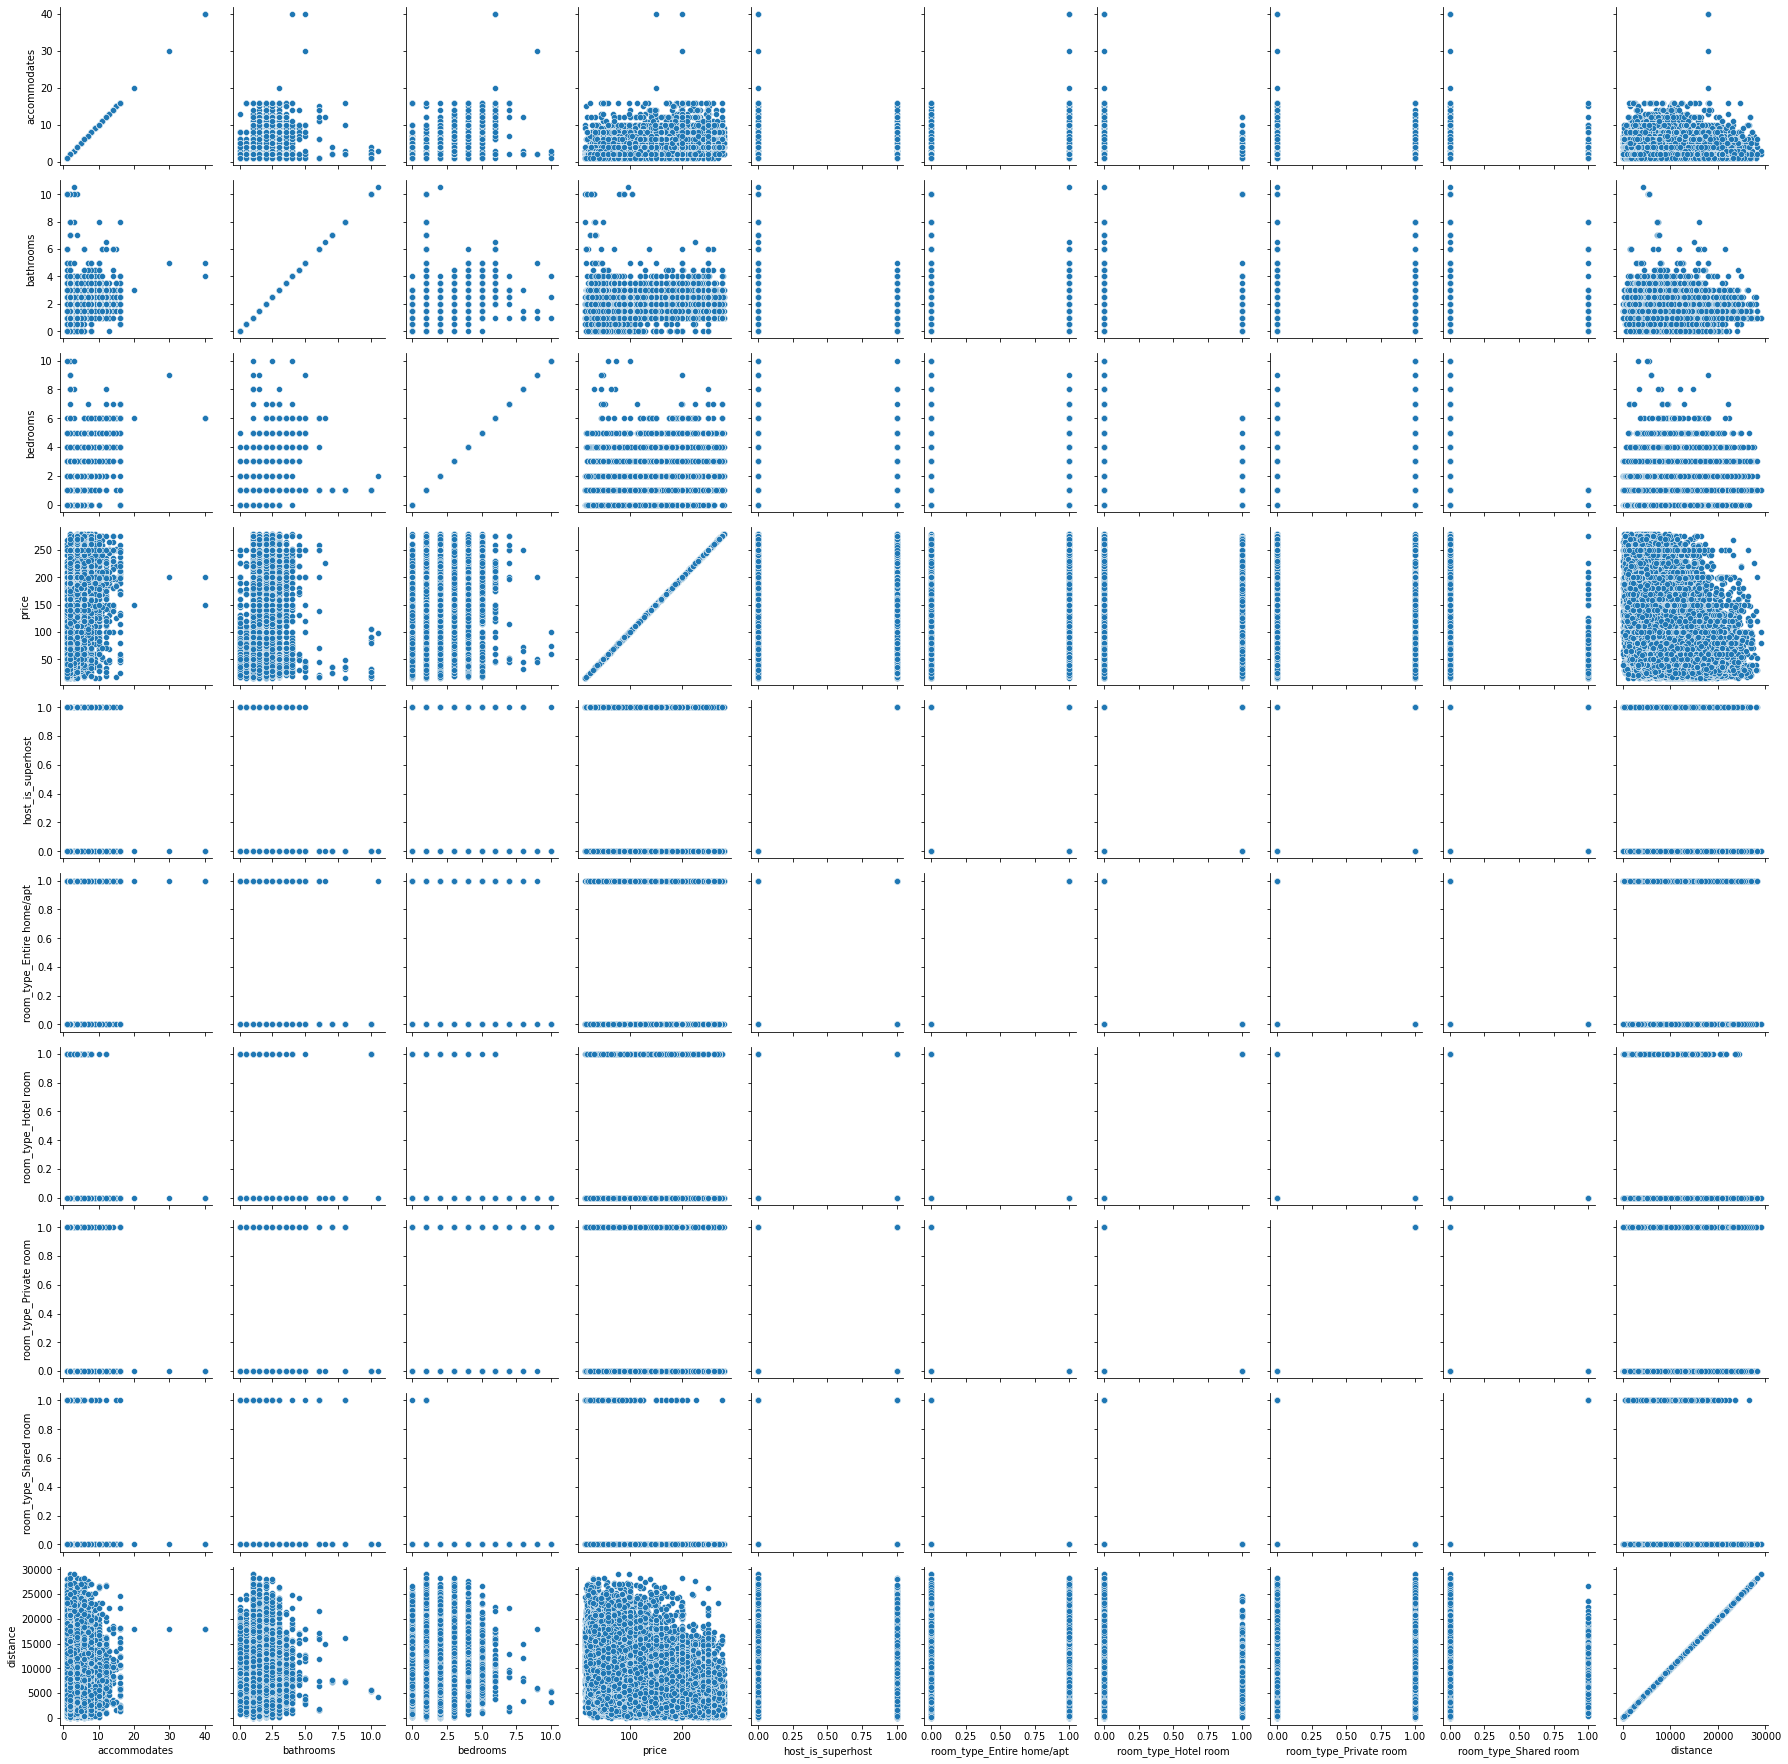

In [92]:
g = sns.PairGrid(london_distance)
g.map(sns.scatterplot)
plt.show()